# Print Metrics and create confusion matrices from evaluation result csv

In [7]:
import json

import numpy as np
from datasets import load_metric
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
label_replacements = {
    'av': {
       'c2i': {'N': 0,'L': 1,'A': 2,'P': 3},
       'i2c': {0: 'N', 1: 'L', 2: 'A', 3: 'P'}
    },
    'ac': {
        'c2i': {'L': 0, 'H': 1},
        'i2c': {0: 'L', 1: 'H'}
    },
    'pr': {
        'c2i': {'L': 0, 'H': 1, 'N': 2},
        'i2c': {0: 'L', 1: 'H', 2: 'N'}
    },
    'ui': {
        'c2i': {'R': 0, 'N': 1},
        'i2c': {0: 'R', 1: 'N'}
    },
    's': {
        'c2i': {'C': 0, 'U': 1},
        'i2c': {0: 'C', 1: 'U'}
    },
    'c': {
        'c2i': {'H': 0, 'N': 1, 'L': 2},
        'i2c': {0: 'H', 1: 'N', 2: 'L'}
    },
    'i': {
        'c2i': {'H': 0, 'N': 1, 'L': 2},
        'i2c': {0: 'H', 1: 'N', 2: 'L'}
    },
    'a': {
        'c2i': {'H': 0, 'N': 1, 'L': 2},
        'i2c': {0: 'H', 1: 'N', 2: 'L'}
    }
}

In [8]:
target_vars = ['av', 'ac', 'pr', 'ui', 's', 'c', 'i', 'a']
file_prefix = 'res_distil-desc_on_descriptions_'
directory = 'results/distilbert-desc_on_only_descriptions'

----------AV RESULTS----------
"eval_loss": 0.3488204777240753
"eval_accuracy": 0.9287030793436727
"eval_f1": 0.8214115411293773
"eval_precision": 0.8406608340058117
"eval_recall": 0.8044369315067081
"eval_cohen_kappa": 0.8284099948337554
"avergae_f1": 0.9282719491275621
----------AC RESULTS----------
"eval_loss": 0.250656396150589
"eval_accuracy": 0.9578332209485277
"eval_f1": 0.8316335749044241
"eval_precision": 0.8659083794311734
"eval_recall": 0.8042151255129815
"eval_cohen_kappa": 0.6635050431161271
"avergae_f1": 0.9558936033552439
----------PR RESULTS----------
"eval_loss": 0.592921793460846
"eval_accuracy": 0.8698134412227467
"eval_f1": 0.8096114793104277
"eval_precision": 0.8247861049957024
"eval_recall": 0.796393682808347
"eval_cohen_kappa": 0.7344424303529049
"avergae_f1": 0.8686273312852333
----------UI RESULTS----------
"eval_loss": 0.2964244782924652
"eval_accuracy": 0.9409755001123848
"eval_f1": 0.9354765839207595
"eval_precision": 0.9366337613942479
"eval_recall": 0.9343

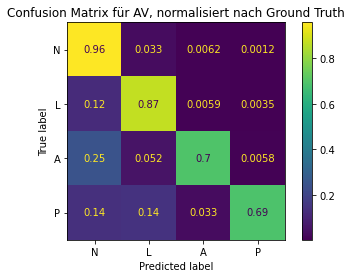

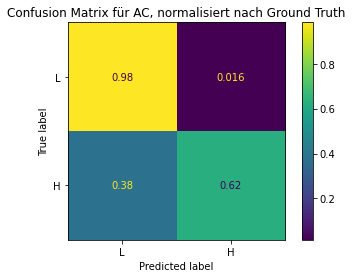

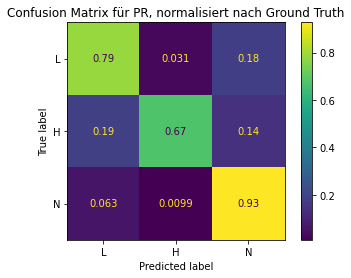

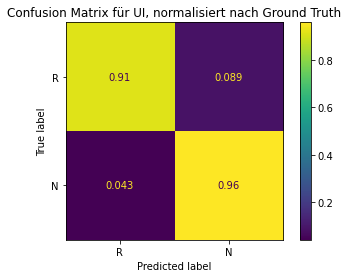

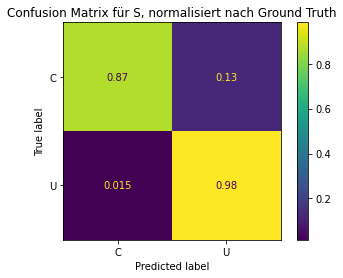

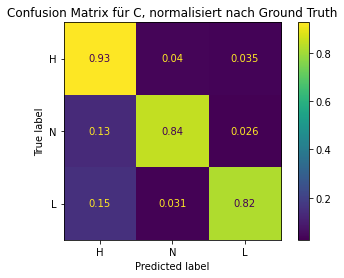

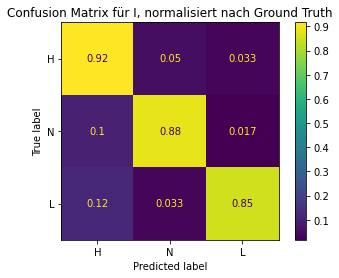

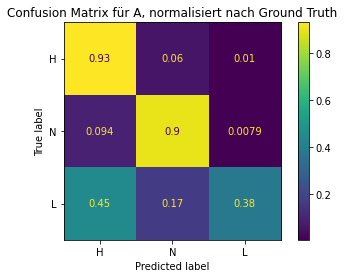

In [9]:
for target_var in target_vars:
    with open(f'{directory}/{file_prefix}{target_var}.json', 'r') as f:
        eval_data = json.load(f)
        predictions = np.argmax(eval_data['predictions'], axis=-1)
        labels = np.array(eval_data['label_ids'])
        mapped_predictions = np.full(shape=len(predictions), fill_value='')
        mapped_labels = np.full(shape=len(labels), fill_value='')
        replacements = label_replacements[target_var]['i2c']
        for n, tup in replacements.items():
            mapped_predictions[predictions == n] = tup
            mapped_labels[labels == n] = tup
        confusion_matrix = metrics.confusion_matrix(labels, predictions, normalize='true')
        f1_metric = load_metric("f1")
        f1_metric_result = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

        # Macro f1: mean of f1 scores of all classes, eg. (f1_1 + f1_2 + f1_3) / 3

        fig, ax = plt.subplots()
        ax.set_title(f"Confusion Matrix für {target_var.upper()}, normalisiert nach Ground Truth")
        if target_var == 'ac':
            labels = ['L', 'H']
        elif target_var == 'av':
            labels = ['N', 'L', 'A', 'P']
        elif target_var == 'a' or target_var == 'c' or target_var == 'i':
            labels = ['H', 'N', 'L']
        elif target_var == 'pr':
            labels = ['L', 'H', 'N']
        elif target_var == 'ui':
            labels = ['R', 'N']
        elif target_var == 's':
            labels = ['C', 'U']
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
        disp.plot(ax=ax, )#cmap='PuBuGn')
        #fig.savefig(f'{directory}/{file_prefix}{target_var}.png', facecolor=fig.get_facecolor(), edgecolor='none')
        eval_metrics = eval_data['metrics']
        print(f"-"*10 + f"{target_var.upper()} RESULTS" + f"-"*10)
        print(f'"eval_loss": {eval_metrics["eval_loss"]}')
        print(f'"eval_accuracy": {eval_metrics["eval_accuracy"]}')
        print(f'"eval_f1": {eval_metrics["eval_f1"]}')
        print(f'"eval_precision": {eval_metrics["eval_precision"]}')
        print(f'"eval_recall": {eval_metrics["eval_recall"]}')
        print(f'"eval_cohen_kappa": {eval_metrics["eval_cohen_kappa"]}')
        print(f'"avergae_f1": {f1_metric_result["f1"]}')